In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data_prep = pd.read_csv('data_prep.csv')

<AxesSubplot:>

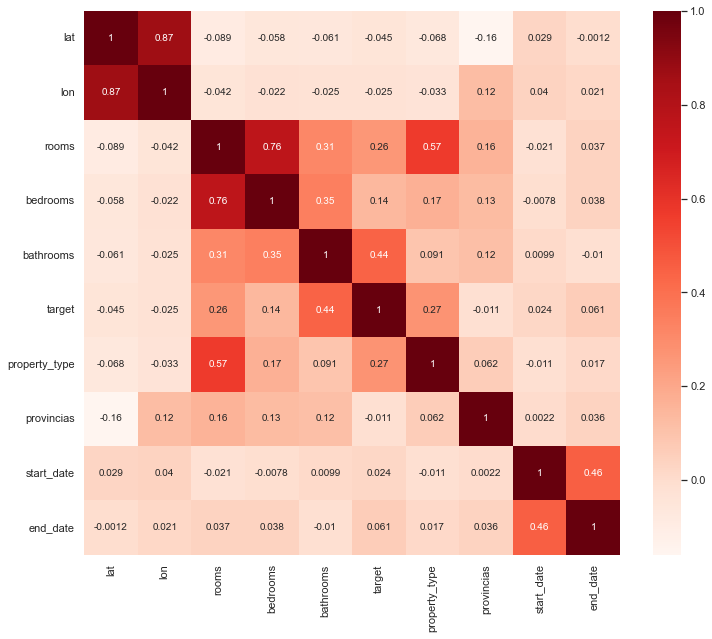

In [3]:
plt.figure(figsize=(12,10))
cor=data_prep.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [19]:
data_prep.head(2)

,lat,lon,rooms,bedrooms,bathrooms,target,property_type,provincias,start_date,end_date
0,6.203000,-75.572000,4.0,4.0,4.0,1,1,1,737773,738155
1,4.722748,-74.073115,2.0,3.0,2.0,0,0,12,737684,737924


Prueba con Boosting, Arboles de Decision
---

--------------

In [7]:
X = data_prep.iloc[:, [0,2,4,6]].values
y = data_prep.iloc[:, 5].values

Generamos un modelo que diga siempre que es barato (0) y medimos su exactitud. <br>
Debemos mejorar ete valor etaditico

In [8]:
from sklearn import metrics

y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
recall_ceros = metrics.recall_score(y,y_pred)
print(accuracy_ceros)
print(recall_ceros)

0.7653341702564933
0.0


Generamos otro modelo que diga siempre que es caro (1) y medimos su exactitud

In [9]:
y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
recall_unos = metrics.recall_score(y,y_pred)
print(accuracy_unos)
print(recall_unos)

0.23466582974350667
1.0


Separamos los datos

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Vamos a mostrarle distintos arboles y posiciones del dataset

In [13]:
lista_de_modelos = []
N_modelos = 10

In [14]:
from sklearn.tree import DecisionTreeClassifier

for i in range(N_modelos):
    X_train_boostrap, _, y_train_boostrap, _ = train_test_split(X_train, y_train, test_size=0.5, stratify = y_train)
    clf = DecisionTreeClassifier(max_depth = None) # Lo dejamos sobreajustar
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)

Evaluamos cada modelo en hold-out

In [15]:
for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))
    print('Recall Modelo ', idx, ' es ', metrics.recall_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.8620349278663629
Recall Modelo  0  es  0.6878774805867127
Accuracy Modelo  1  es  0.8610225259427993
Recall Modelo  1  es  0.6831320103537533
Accuracy Modelo  2  es  0.8629207795494811
Recall Modelo  2  es  0.6903580672993961
Accuracy Modelo  3  es  0.8608453556061757
Recall Modelo  3  es  0.6887402933563417
Accuracy Modelo  4  es  0.8608200455580866
Recall Modelo  4  es  0.683455565142364
Accuracy Modelo  5  es  0.8618071374335611
Recall Modelo  5  es  0.6864754098360656
Accuracy Modelo  6  es  0.8612503163756011
Recall Modelo  6  es  0.6769844693701467
Accuracy Modelo  7  es  0.8611237661351556
Recall Modelo  7  es  0.6774158757549612
Accuracy Modelo  8  es  0.8642875221462921
Recall Modelo  8  es  0.6883088869715271
Accuracy Modelo  9  es  0.8618577575297393
Recall Modelo  9  es  0.6849654874892148


Evaluemos, ahora, el accuracy de todo el ensamble usando el conjunto de hold-out. Lo haremos con el promedio de las probabilidades que devuelve cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo

In [16]:
probs_test_pred = np.zeros(y_test.size)

In [17]:
# Recorremos la lista y predecimos las probabilidades

for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    #print(probs_test_pred_modelo.shape)
    probs_test_pred +=probs_test_pred_modelo[:,1]

In [18]:
probs_test_pred = probs_test_pred/N_modelos

In [19]:
y_test_pred = probs_test_pred>0.5
y_test_pred = y_test_pred.astype(int)

In [20]:
print('Accuracy del ensamble: ', metrics.accuracy_score(y_test, y_test_pred))
print('Recall del ensamble: ', metrics.recall_score(y_test, y_test_pred))

Accuracy del ensamble:  0.8775752973930651
Recall del ensamble:  0.7079378774805867


Prediccion del modelo para test
---

------------

In [21]:
data_test = pd.read_csv('data_test.csv')

In [23]:
X = data_test.iloc[:, [0,2,4,6]].values
Y_apred = clf.predict(X)

In [24]:
resultado = pd.DataFrame({'pred': Y_apred})

In [27]:
resultado.to_csv("JavieraArrieta.csv", index=False)